In [3]:
import pandas as pd

# 国民民主党関連のデータを読み込み
df_kdp = pd.read_csv("DPFP_Clips.csv", encoding="utf-8")

# 参政党関連のデータを読み込み
df_ssp = pd.read_csv("Sanseito_Clips.csv", encoding="utf-8")

# 読み込み確認（先頭5行）
print("KDPデータの確認")
display(df_kdp.head())

print("SSPデータの確認")
display(df_ssp.head())


KDPデータの確認


,videoId,title,description,channelTitle,publishedAt,viewCount,duration,分類,Genre,Video_type
0,AELcUB5ylPA,『news23』 小川彩佳アナが秋葉原で玉木雄一郎代表へ直撃姿！”自民圧力で降板”のウワサを...,動画生成: NoLang (no-lang.com)\nVOICEVOX: ずんだもん,話題のニュース,2025-07-16T12:28:51Z,18152,47,メディア批判,User-Generated Content (including clips),Shorts
1,BerBC5pqktE,【太田光が問う／国民民主党】玉木雄一郎代表ホンネ対談 選挙の日、そのまえに。｜TBS NEW...,7月20日投開票の参議院選挙を前に、爆笑問題・太田光が「選挙の日2025」のスペシャルキャス...,TBS NEWS DIG Powered by JNN,2025-07-14T07:40:00Z,294949,1810,メディア批判,Media,Video
2,AaPjakO0Ou8,榛葉幹事長最後の訴え#国民民主党 #玉木雄一郎 #榛葉賀津也 #奥村よしひろ＃牛田まゆ#sh...,2025年7月19日新橋SL広場街頭演説。\n\n引用元動画\nhttps://www.yo...,国民民主党私設応援団 凡事徹底,2025-07-19T13:08:19Z,33171,58,候補者PR,User-Generated Content (including clips),Shorts
3,4Y3w1FqT388,【衝撃】神谷代表、玉木さんにエグい協力要請してしまう,下記の出典に基づき解説しています\n■出典\nhttps://x.com/jinkamiya...,ガレ速報,2025-07-16T07:03:09Z,277962,212,候補者PR,User-Generated Content (including clips),Video
4,VER_tZhp6aU,#榛葉賀津也 国民もう気がついたよね！ 【国民民主党 参議院選挙2025 比例名簿政策】,国民に税金を返して経済を元気にする。消費税率下げてもみんなが元気になって買い物すれば、収入増...,平戸航太チャンネル【国民民主党 参議院 比例代表公認】,2025-07-18T06:00:26Z,36144,59,候補者PR,Candidate,Shorts


SSPデータの確認


,videoId,title,description,channelTitle,publishedAt,viewCount,duration,分類,Genre,Video_type
0,w2wk_SkDJvM,【参政党】「日本人ファースト」って何だ？過去に過激発言なぜ？他党と組む可能性は？神谷宗幣代表...,.\n◆ABEMAで無料視聴\n▷https://abema.go.link/gCY4N\n...,ABEMA Prime #アベプラ【公式】,2025-07-09T10:30:41Z,429047,2147,その他,Media,Video
1,4Y3w1FqT388,【衝撃】神谷代表、玉木さんにエグい協力要請してしまう,下記の出典に基づき解説しています\n■出典\nhttps://x.com/jinkamiya...,ガレ速報,2025-07-16T07:03:09Z,277969,212,候補者PR,User-Generated Content (including clips),Video
2,FhoexTtJ_Uo,【ホリエモン】参政党大フィーバー神谷宗幣の謎,ご視聴いただきありがとうございます。\nチャンネル登録、高評価よろしくお願いいたします！\n...,サクッと ! ホリエモン【切り抜き】,2025-07-19T16:11:16Z,130668,35,その他,User-Generated Content (including clips),Shorts
3,270Nios9i54,【医師が説明】参政党の医療政策のウソを分かりやすく解説！,参政党が話題になっています。神谷代表が語る医療関係の公約について説明します。終末期医療や看取...,病院グループ総帥 中田総院長,2025-07-19T03:57:22Z,26206,2243,政策提言,User-Generated Content (including clips),Video
4,#NAME?,【ひろゆき】参政党神谷代表の子供産めない問題発言について、正直に言います。【切り抜き】,#ひろゆき #ひろゆき切り抜き #論破 #解説 #ひろゆきの広場 #聞き流し #shorts...,ひろゆきの広場【ひろゆき切り抜き】,2025-07-07T08:00:00Z,9333,173,その他,User-Generated Content (including clips),Video


In [4]:
df_kdp.shape

(1061, 10)

In [5]:
df_ssp.shape

(1289, 10)

In [6]:
def analyze_dataset(df, label=""):
    print(f"--- {label} 分析 ---")

    # 総再生数
    total_views = df["viewCount"].sum()
    print(f"総再生数: {total_views:,}")

    # 平均再生数
    average_views = df["viewCount"].mean()
    print(f"平均再生数: {average_views:,.2f}")

    # チャンネルの本数ランキング トップ10
    print("\nチャンネル別の動画本数ランキング（トップ10）:")
    top_channels = (
        df["channelTitle"]
        .value_counts()
        .head(10)
        .rename_axis("channelTitle")
        .reset_index(name="videoCount")
    )
    display(top_channels)

    # ユニークチャンネル数
    unique_channels = df["channelTitle"].nunique()
    print(f"\nユニークチャンネル数: {unique_channels}")

# 国民民主党データセットの分析
analyze_dataset(df_kdp, label="国民民主党")

# 参政党データセットの分析
analyze_dataset(df_ssp, label="参政党")


--- 国民民主党 分析 ---
総再生数: 95,047,573
平均再生数: 89,583.01

チャンネル別の動画本数ランキング（トップ10）:


,channelTitle,videoCount
0,国民民主党,69
1,平戸航太チャンネル【国民民主党 参議院 比例代表公認】,45
2,国民民主党推し活ちゃんねる,40
3,かわもと健一 国民民主党,36
4,牛田まゆチャンネル,25
5,日テレNEWS,23
6,人類予備校,16
7,たまきチャンネル,15
8,奥村 よしひろ / Yoshihiro Okumura,14
9,たまきカフェ,14



ユニークチャンネル数: 403
--- 参政党 分析 ---
総再生数: 285,395,335
平均再生数: 221,408.33

チャンネル別の動画本数ランキング（トップ10）:


,channelTitle,videoCount
0,人類予備校,89
1,参政党,46
2,ポメスキャンダル【ネットの反応】,31
3,文化人放送局,29
4,ココノセイジ,24
5,政治家ターゲットch,21
6,喜べ!JAPAN,21
7,ANNnewsCH,19
8,色々政治家情報,19
9,TBS NEWS DIG Powered by JNN,18



ユニークチャンネル数: 467


In [7]:
!pip install isodate


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [8]:
def summarize_channel_stats(df, label=""):
    df["viewCount"] = pd.to_numeric(df["viewCount"], errors="coerce")
    summary = df.groupby("channelTitle").agg(
        video_count=("videoId", "count"),
        total_views=("viewCount", "sum")
    ).sort_values("total_views", ascending=False).reset_index()
    
    print(f"{label} チャンネルごとの動画本数と合計再生数（上位）:")
    display(summary)
    return summary

# 国民民主党
kdp_summary = summarize_channel_stats(df_kdp, "国民民主党")

# 参政党
ssp_summary = summarize_channel_stats(df_ssp, "参政党")


国民民主党 チャンネルごとの動画本数と合計再生数（上位）:


,channelTitle,video_count,total_views
0,国民民主党,69,6828579
1,政治をエンタメに,10,5528995
2,国民うさぎ【国民民主党応援団】,7,5154853
3,玉木雄一郎の頭脳【国民民主党 切り抜き】,10,3875265
4,日テレNEWS,23,3853492
...,...,...,...
398,にっぽんポンポコ党,1,5
399,佐々木先生切り抜き,1,5
400,dadzgurl14,1,5
401,晩酌福祉らじお,1,3


参政党 チャンネルごとの動画本数と合計再生数（上位）:


,channelTitle,video_count,total_views
0,ポメスキャンダル【ネットの反応】,31,25841221
1,話題のニュースch,13,19075064
2,チワワのウワサ【ネットの反応】,17,16818138
3,参政党,46,11294995
4,日本の政治家,5,8104545
...,...,...,...
462,ガル子の時事ニュースまとめ,1,5
463,スポーツニュース,1,4
464,Japan news worlds,1,4
465,Muhammad Ramzan,1,3


In [12]:
# ファイル名を指定して保存（文字化け防止のため utf-8-sig を使用）
kdp_summary.to_csv("kdp_channel_summary.csv", index=False, encoding="utf-8-sig")
ssp_summary.to_csv("ssp_channel_summary.csv", index=False, encoding="utf-8-sig")


In [6]:
from IPython.display import FileLink

print("📥 国民民主党（KDP）チャンネル集計ダウンロード:")
display(FileLink("kdp_channel_summary.csv"))

print("📥 参政党（SSP）チャンネル集計ダウンロード:")
display(FileLink("ssp_channel_summary.csv"))


📥 国民民主党（KDP）チャンネル集計ダウンロード:


/Users/kensho/Desktop/Project/選挙/YouTube分析/kdp_channel_summary.csv

📥 参政党（SSP）チャンネル集計ダウンロード:


/Users/kensho/Desktop/Project/選挙/YouTube分析/ssp_channel_summary.csv

In [9]:
top_kdp = kdp_summary.sort_values("total_views", ascending=False).head(50)
top_ssp = ssp_summary.sort_values("total_views", ascending=False).head(50)

In [10]:
top_kdp

,channelTitle,video_count,total_views
0,国民民主党,69,6828579
1,政治をエンタメに,10,5528995
2,国民うさぎ【国民民主党応援団】,7,5154853
3,玉木雄一郎の頭脳【国民民主党 切り抜き】,10,3875265
4,日テレNEWS,23,3853492
5,国民民主党推し活ちゃんねる,40,3302840
6,FNNプライムオンライン,9,2901430
7,日本の政治を解体,1,2694758
8,秒で暴く政治の闇,1,2681485
9,中田敦彦のYouTube大学 - NAKATA UNIVERSITY,2,2399123


In [11]:
top_ssp

,channelTitle,video_count,total_views
0,ポメスキャンダル【ネットの反応】,31,25841221
1,話題のニュースch,13,19075064
2,チワワのウワサ【ネットの反応】,17,16818138
3,参政党,46,11294995
4,日本の政治家,5,8104545
5,色々政治家情報,19,7679306
6,【ニュース アメイジング】ガロン,10,7440221
7,イルカ政治,13,5858222
8,TBS NEWS DIG Powered by JNN,18,5135915
9,橙色は希望の色,11,5108484


In [12]:
common_channels = set(top_kdp["channelTitle"]) & set(top_ssp["channelTitle"])

In [13]:
common_channels

{'ABEMA Prime #アベプラ【公式】',
 'ANNnewsCH',
 'JAPANの事実',
 'TBS NEWS DIG Powered by JNN',
 '【ニュース アメイジング】ガロン ',
 'ポメスキャンダル【ネットの反応】',
 '国民の叫び',
 '日テレNEWS',
 '日本の政治を解体',
 '色々政治家情報'}

In [14]:
sankey_df = []

for channel in common_channels:
    kdp_views = top_kdp[top_kdp["channelTitle"] == channel]["total_views"].values[0]
    ssp_views = top_ssp[top_ssp["channelTitle"] == channel]["total_views"].values[0]
    # value: 平均 or 大きい方 or 両方合算でも可。ここでは合算します
    value = kdp_views + ssp_views
    sankey_df.append({
        "source": channel,  # 国民民主党側
        "target": channel,  # 参政党側
        "value": value
    })

import pandas as pd
sankey_df = pd.DataFrame(sankey_df)


In [15]:
sankey_df

,source,target,value
0,日テレNEWS,日テレNEWS,8427381
1,国民の叫び,国民の叫び,5431530
2,色々政治家情報,色々政治家情報,8103395
3,JAPANの事実,JAPANの事実,3024758
4,ポメスキャンダル【ネットの反応】,ポメスキャンダル【ネットの反応】,27870532
5,【ニュース アメイジング】ガロン,【ニュース アメイジング】ガロン,8489149
6,ABEMA Prime #アベプラ【公式】,ABEMA Prime #アベプラ【公式】,4175119
7,ANNnewsCH,ANNnewsCH,4080699
8,日本の政治を解体,日本の政治を解体,4590241
9,TBS NEWS DIG Powered by JNN,TBS NEWS DIG Powered by JNN,5999247


In [16]:
# 60秒以下の国民民主党関連動画
df_kdp_short = df_kdp[df_kdp['duration'] <= 60]

# 60秒以下の参政党関連動画
df_ssp_short = df_ssp[df_ssp['duration'] <= 60]

# 結果の表示（必要に応じて）
print("60秒以下の国民民主党関連動画:")
display(df_kdp_short)

print("60秒以下の参政党関連動画:")
display(df_ssp_short)


60秒以下の国民民主党関連動画:


,videoId,title,description,channelTitle,publishedAt,viewCount,duration,分類,Genre,Video_type
0,AELcUB5ylPA,『news23』 小川彩佳アナが秋葉原で玉木雄一郎代表へ直撃姿！”自民圧力で降板”のウワサを...,動画生成: NoLang (no-lang.com)\nVOICEVOX: ずんだもん,話題のニュース,2025-07-16T12:28:51Z,18152,47,メディア批判,User-Generated Content (including clips),Shorts
2,AaPjakO0Ou8,榛葉幹事長最後の訴え#国民民主党 #玉木雄一郎 #榛葉賀津也 #奥村よしひろ＃牛田まゆ#sh...,2025年7月19日新橋SL広場街頭演説。\n\n引用元動画\nhttps://www.yo...,国民民主党私設応援団 凡事徹底,2025-07-19T13:08:19Z,33171,58,候補者PR,User-Generated Content (including clips),Shorts
4,VER_tZhp6aU,#榛葉賀津也 国民もう気がついたよね！ 【国民民主党 参議院選挙2025 比例名簿政策】,国民に税金を返して経済を元気にする。消費税率下げてもみんなが元気になって買い物すれば、収入増...,平戸航太チャンネル【国民民主党 参議院 比例代表公認】,2025-07-18T06:00:26Z,36144,59,候補者PR,Candidate,Shorts
5,pHxZrre2vqM,7/16 朝のあいさつ #小林さやか #千葉選挙区 #国民民主党 #平戸航太,NaN,小林さやかチャンネル,2025-07-16T02:28:49Z,2516,41,候補者PR,Candidate,Shorts
6,20qODnAx1bs,【国民民主党】玉ちゃんよく言った #おすすめ #国民民主党 #玉木雄一郎 #石破総理,NaN,混沌の文太情熱チャンネル,2025-07-04T08:19:35Z,1141397,10,候補者PR,User-Generated Content (including clips),Shorts
...,...,...,...,...,...,...,...,...,...,...
1040,GTcekC_fPMY,玉木雄一郎が自民党の政策についてはっきりと苦言を呈す。 #国民民主党 #玉木雄一郎 #党首討...,NaN,色々政治家情報,2025-07-07T12:13:00Z,259513,42,与党批判,User-Generated Content (including clips),Shorts
1053,L_Ru8IfMqZs,「皇室と憲法の提起と対中政策、子育て、刑事司法政策、人権、外交が政策」国民民主党から公認取り...,人類予備校X（旧ツイッター）\nhttps://twitter.com/jinruiyobi...,人類予備校,2025-07-04T04:17:26Z,243,46,候補者PR,User-Generated Content (including clips),Shorts
1055,u1p66fiuWb8,「皇室と憲法の提起と対中政策、子育て、刑事司法政策、人権、外交が政策」国民民主党から離党の山...,人類予備校X（旧ツイッター）\nhttps://twitter.com/jinruiyobi...,人類予備校,2025-07-04T04:21:50Z,3428,46,候補者PR,User-Generated Content (including clips),Shorts
1058,euklFZwkto4,【国民民主党】玉ちゃんもどこか信用出来ないからね〜😢 #おすすめ #国民民主党#玉木雄一郎 ...,NaN,混沌の文太情熱チャンネル,2025-07-15T06:34:01Z,6223,9,候補者PR,User-Generated Content (including clips),Shorts


60秒以下の参政党関連動画:


,videoId,title,description,channelTitle,publishedAt,viewCount,duration,分類,Genre,Video_type
2,FhoexTtJ_Uo,【ホリエモン】参政党大フィーバー神谷宗幣の謎,ご視聴いただきありがとうございます。\nチャンネル登録、高評価よろしくお願いいたします！\n...,サクッと ! ホリエモン【切り抜き】,2025-07-19T16:11:16Z,130668,35,その他,User-Generated Content (including clips),Shorts
7,YHe3tZkpz3c,㊗️110万再生!!メディアの参政党叩きの真相が判明,#shorts #政治 #参政党 #オールドメディア #スパイ防止法\n\nVOICEVO...,変わるJAPAN【日本応援CH】,2025-07-10T03:00:42Z,1168915,60,その他,User-Generated Content (including clips),Shorts
8,S8kGytZevhI,㊗️10万再生!あっぱれ!参政党!さやを守る三橋貴明が漢の中の漢だった! #政治 #参政党 ...,NaN,覚醒Japan賞賛show,2025-07-17T22:53:55Z,112786,57,候補者PR,User-Generated Content (including clips),Shorts
12,tlV8NMwAGZw,【参政党20議席へ❗圧巻の魂の演説‼️最終日】 #参政党,#shorts #参政党 #神谷宗幣 #日本人ファースト #参議院選挙2025 \n参議院選...,日本を救えるのは国民の政治参加しかない参政党Ver.,2025-07-19T14:45:13Z,183359,60,候補者PR,User-Generated Content (including clips),Shorts
13,5mY7U0dnTPc,「これはヤバイ」参政党議席予想がとんでもないことにｗ#shorts#ニュース#政治#参政党#...,NaN,怒りのドラゴン通信,2025-07-09T08:00:05Z,1100584,58,メディア批判,User-Generated Content (including clips),Shorts
...,...,...,...,...,...,...,...,...,...,...
1273,D4MAOFyEdro,【参政党】神谷さん 参院選は伸びるんじゃない❓ #おすすめ #参政党 #参政党は止まらない ...,NaN,混沌の文太情熱チャンネル,2025-07-04T07:00:31Z,25327,6,その他,User-Generated Content (including clips),Shorts
1274,VDIxNe5fzPg,【参政党】日本人ファースト 神谷宗弊 #おすすめ #参院選2025 #参政党 #日本人ファー...,NaN,混沌の文太情熱チャンネル,2025-07-16T07:34:37Z,9144,31,その他,User-Generated Content (including clips),Shorts
1275,iWGqA502W8k,参政党 支持率ぱない 神谷宗弊 #おすすめ #参政党 #参院選2025 #支持率#神谷宗幣,NaN,混沌の文太情熱チャンネル,2025-07-13T07:01:42Z,24556,11,その他,User-Generated Content (including clips),Shorts
1276,ea-8Sgrcowg,【参政党 神谷宗弊】日本で1番熱い男 #おすすめ #参院選2025 #参政党#神谷宗幣 #拡散希望,NaN,混沌の文太情熱チャンネル,2025-07-11T07:24:44Z,18168,25,その他,User-Generated Content (including clips),Shorts


In [17]:
# 共通関数：指定データフレームから情報を出力
def analyze_short_videos(df, label):
    print(f"==== {label} ====")

    # 1. ユニークチャンネルの数
    unique_channels = df['channelTitle'].nunique()
    print(f"ユニークチャンネル数: {unique_channels}")

    # 2. 再生数トップ20（再生数が多い順に並べる）
    top_views = df.sort_values(by='viewCount', ascending=False).head(20)
    print("再生数トップ20:")
    display(top_views[['title', 'channelTitle', 'viewCount', 'duration']])

# 国民民主党ショート動画分析
analyze_short_videos(df_kdp_short, "国民民主党")

# 参政党ショート動画分析
analyze_short_videos(df_ssp_short, "参政党")


==== 国民民主党 ====
ユニークチャンネル数: 151
再生数トップ20:


,title,channelTitle,viewCount,duration
561,【たった1票で】大学生の生活を変えた選挙の力！ #shorts #国民民主党 #榛葉賀津也,国民うさぎ【国民民主党応援団】,3662009,22
883,この参議院選挙は石破よりも榛葉だよ #榛葉幹事長 #国民民主党 #shorts,政治をエンタメに,1967414,59
680,㊗️170万回再生突破中【党首討論会】石破総理「米を増やします」→玉木代表「もう田植え終わっ...,選挙に行きたくなるTV,1808948,54
686,リアルではおとなしい米山隆一議員/Xでまたダルがらみ宣言 #shorts,国民の叫び,1639542,39
1035,㊗️130万再生！れいわ大石、参政党に噛みつきフルボッコw,ポメスキャンダル【ネットの反応】,1417104,60
790,鉄板の掴みネタ爆誕秘話 #榛葉幹事長 #国民民主党 #shorts,政治をエンタメに,1224436,57
6,【国民民主党】玉ちゃんよく言った #おすすめ #国民民主党 #玉木雄一郎 #石破総理,混沌の文太情熱チャンネル,1141397,10
840,玉木代表「ロシアが参政党を使って選挙妨害してる」→神谷代表「スパイ防止法がいるね」,【ニュース アメイジング】ガロン,1048928,31
367,「大企業への献金やめろ！」頑なに消費税を死守する石破首相に玉木・山本が激しい口撃 #政治 #...,政治のタブーに挑む者,1005431,60
92,年少扶養控除を復活します！#国民民主党,国民民主党,851439,36


==== 参政党 ====
ユニークチャンネル数: 154
再生数トップ20:


,title,channelTitle,viewCount,duration
1246,全部利権なのバレてんだよ #shorts #おすすめ #フィフィ #参政党 #河合ゆうすけ ...,話題のニュースch,6316729,53
1254,多様性をはき違えるな #shorts #おすすめ #フィフィ #参政党 #河合ゆうすけ ...,話題のニュースch,4730863,27
340,党首討論から“排除”された参政党…日本記者クラブの本音がヤバい #shorts #神谷宗幣 ...,日本政治の夜明け,4419324,60
975,【神谷宗幣】米が作れなくなったら、日本は終わりなんだよ💢#shorts #short #ショ...,日本の政治家,4363078,60
1125,㊗️300万再生！報ステ、とんでもない議席予想発表するw,ポメスキャンダル【ネットの反応】,3131914,60
952,【参政党】驚愕！ルール違反即解雇 #shorts,国民の叫び,2775409,57
28,「よくぞ言ってくれた！」神谷代表が悪徳記者を一瞬で黙らせた件に関する雑学#shorts #雑...,雑学猫,2657331,60
297,自民党に対抗できるのは参政党だけ,ニッポンのチカラ,2629691,35
523,参政党の“当選圏内”入り！この候補者に注目が集まる理由とは #井川意高 #大王製紙 #加賀孝...,井川意高の政治・経済を学ぶ,2198910,52
594,㊗️190万再生！宮城県知事、参政党にブチギレ抗議した結果…,ポメスキャンダル【ネットの反応】,2160452,60


In [18]:
def analyze_short_videos(df, label):
    print(f"==== {label} ====")

    # 3. チャンネルごとの総再生数トップ20
    top_total_views = (
        df.groupby('channelTitle')['viewCount']
        .sum()
        .sort_values(ascending=False)
        .head(20)
        .reset_index()
    )
    print("チャンネルごとの総再生数トップ20:")
    display(top_total_views)

# 国民民主党ショート動画分析
analyze_short_videos(df_kdp_short, "国民民主党")

# 参政党ショート動画分析
analyze_short_videos(df_ssp_short, "参政党")


==== 国民民主党 ====
チャンネルごとの総再生数トップ20:


,channelTitle,viewCount
0,政治をエンタメに,5528995
1,国民うさぎ【国民民主党応援団】,5154853
2,国民民主党,3311019
3,国民民主党推し活ちゃんねる,2447189
4,ポメスキャンダル【ネットの反応】,1986370
5,選挙に行きたくなるTV,1808948
6,政治のタブーに挑む者,1683173
7,国民の叫び,1664757
8,混沌の文太情熱チャンネル,1158282
9,【ニュース アメイジング】ガロン,1048928


==== 参政党 ====
チャンネルごとの総再生数トップ20:


,channelTitle,viewCount
0,ポメスキャンダル【ネットの反応】,21699495
1,話題のニュースch,15294920
2,日本の政治家,8104545
3,【ニュース アメイジング】ガロン,7440221
4,色々政治家情報,5524879
5,橙色は希望の色,5108484
6,日本政治の夜明け,4995483
7,選挙タイム,3757039
8,国民の叫び,3319852
9,うさ耳情報局,3292666


In [19]:
def compare_views_shorts_vs_videos(df, label):
    # duration が NaN でない行に限定し、型変換（念のため）
    df = df[df['duration'].notna()].copy()
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

    # 60秒以下をShorts、それ以外をVideoに分類
    df['type'] = df['duration'].apply(lambda x: 'shorts' if x <= 60 else 'video')

    # 総再生数の比較
    total_views = df.groupby('type')['viewCount'].sum().reset_index()
    print(f"==== {label}：総再生数 ====")
    display(total_views)

    # 平均再生数の比較
    avg_views = df.groupby('type')['viewCount'].mean().reset_index()
    print(f"==== {label}：平均再生数 ====")
    display(avg_views)

# 国民民主党の比較
compare_views_shorts_vs_videos(df_kdp, "国民民主党")

# 参政党の比較
compare_views_shorts_vs_videos(df_ssp, "参政党")


==== 国民民主党：総再生数 ====


,type,viewCount
0,shorts,37276311
1,video,57771262


==== 国民民主党：平均再生数 ====


,type,viewCount
0,shorts,108361.369186
1,video,80573.587169


==== 参政党：総再生数 ====


,type,viewCount
0,shorts,135324149
1,video,150071186


==== 参政党：平均再生数 ====


,type,viewCount
0,shorts,352406.638021
1,video,165824.514917


ジャンル別 再生数と割合（%）


,jenre,total_views,percentage
0,Candidate,3562236,3.747845
1,Media,19474580,20.489298
2,Official,8047884,8.467217
3,Other,48653,0.051188
4,Political Commentary or Clips,60490835,63.642693
5,Public Figure,3423385,3.601760


<Axes: title={'center': 'Share of Total Views by Genre (DPFP)'}>

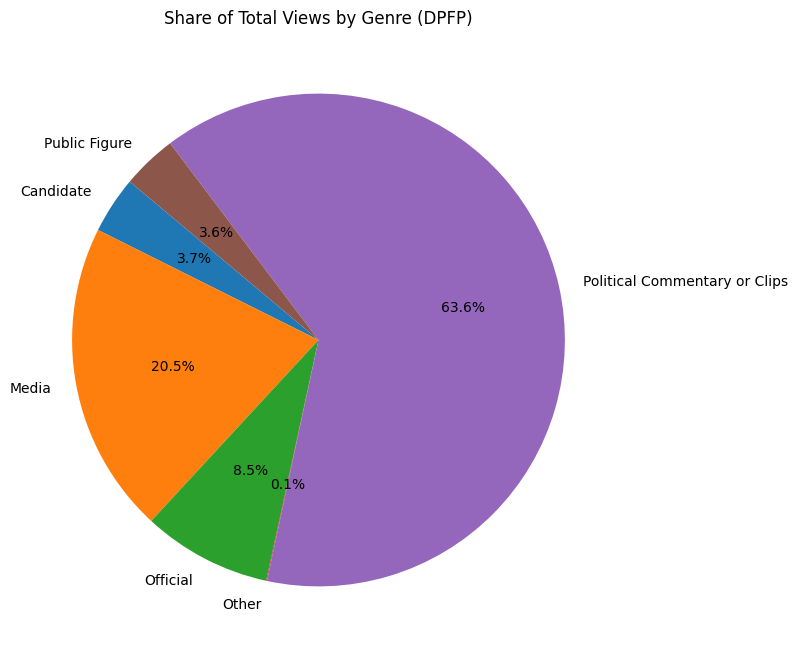

In [30]:
import pandas as pd

# データ読み込み
df_summary = pd.read_csv("dpfp_channel_summary.csv")

# ジャンルごとの再生数合計を計算
genre_views_df = df_summary.groupby("jenre")["total_views"].sum().reset_index()

# 総再生数を算出して割合列を追加
total = genre_views_df["total_views"].sum()
genre_views_df["percentage"] = genre_views_df["total_views"] / total * 100

# 表の表示
print("ジャンル別 再生数と割合（%）")
display(genre_views_df)

# 円グラフ（Seriesに変換して表示）
genre_views_series = genre_views_df.set_index("jenre")["total_views"]
genre_views_series.plot.pie(
    figsize=(8, 8),
    autopct="%.1f%%",
    startangle=140,
    ylabel="",
    title="Share of Total Views by Genre (DPFP)"
)


ジャンル別 再生数と割合（%）


,jenre,total_views,percentage
0,Candidate,13934,0.004882
1,Media,24989691,8.756167
2,Official,11463727,4.016789
3,Other,86547,0.030325
4,Political Commentary & Clips,237898983,83.357699
5,Public Figure,10942453,3.834139


<Axes: title={'center': 'Share of Total Views by Genre (DPFP)'}>

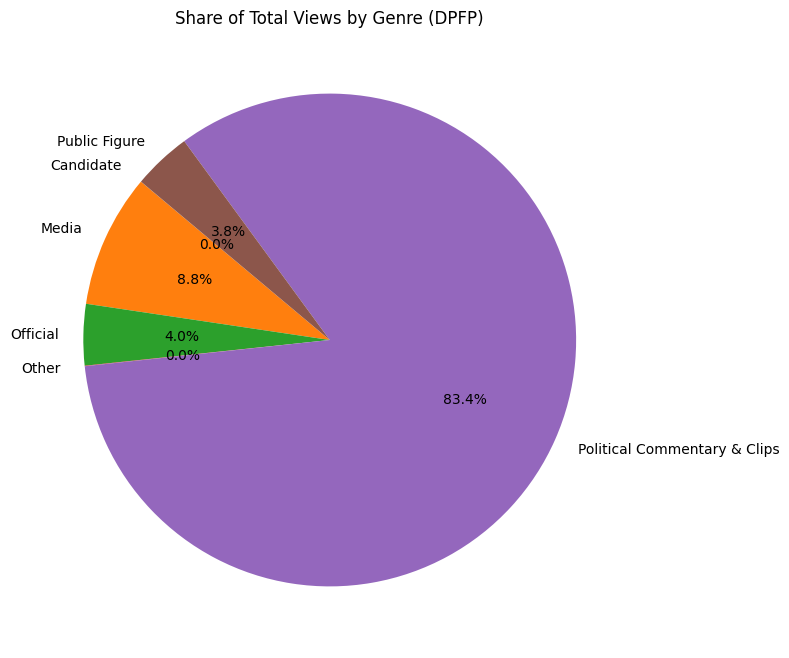

In [32]:
import pandas as pd

# データ読み込み
df_summary = pd.read_csv("sanseito_channel_summary.csv")

# ジャンルごとの再生数合計を計算
genre_views_df = df_summary.groupby("jenre")["total_views"].sum().reset_index()

# 総再生数を算出して割合列を追加
total = genre_views_df["total_views"].sum()
genre_views_df["percentage"] = genre_views_df["total_views"] / total * 100

# 表の表示
print("ジャンル別 再生数と割合（%）")
display(genre_views_df)

# 円グラフ（Seriesに変換して表示）
genre_views_series = genre_views_df.set_index("jenre")["total_views"]
genre_views_series.plot.pie(
    figsize=(8, 8),
    autopct="%.1f%%",
    startangle=140,
    ylabel="",
    title="Share of Total Views by Genre (DPFP)"
)
